In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv(r'C:/Users/yaman/OneDrive/Documents/SET Conference/Datasets/TCS.csv')

In [3]:
data

,Date,Price,Open,High,Low,Volume,Chg%
0,"Jan 02, 2007",301.33,296.72,303.62,293.48,1.55,2.17
1,"Jan 03, 2007",308.96,302.41,310.86,299.07,4.38,2.53
2,"Jan 04, 2007",303.87,310.14,310.14,301.71,3.97,-1.65
3,"Jan 05, 2007",304.83,305.31,306.18,302.44,2.72,0.32
4,"Jan 08, 2007",300.19,303.86,303.86,293.24,4.95,-1.52
...,...,...,...,...,...,...,...
3958,"Dec 26, 2022",3252.90,3228.35,3272.00,3225.05,870.16,0.76
3959,"Dec 27, 2022",3259.50,3269.20,3273.80,3231.50,835.88,0.20
3960,"Dec 28, 2022",3257.10,3249.80,3266.10,3226.00,910.80,-0.07
3961,"Dec 29, 2022",3268.75,3231.10,3271.50,3228.00,1.04,0.36


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3963 non-null   object 
 1   Price   3963 non-null   float64
 2   Open    3963 non-null   float64
 3   High    3963 non-null   float64
 4   Low     3963 non-null   float64
 5   Volume  3963 non-null   float64
 6   Chg%    3963 non-null   float64
dtypes: float64(6), object(1)
memory usage: 216.9+ KB


In [5]:
data.shape

(3963, 7)

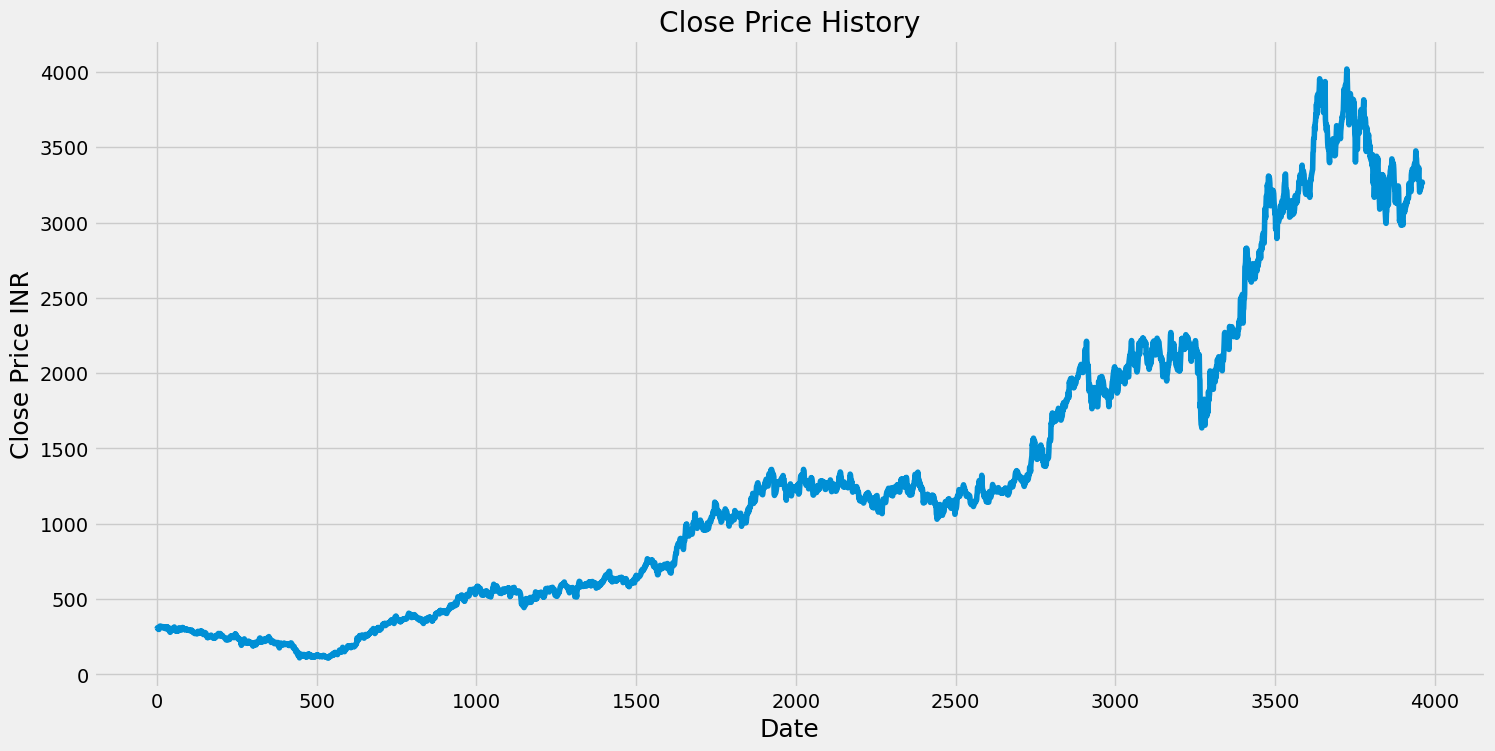

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Price'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [7]:
data=data.filter(['Price'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.04950581],
       [0.05145649],
       [0.05015519],
       ...,
       [0.80517505],
       [0.80815348],
       [0.80507279]])

In [8]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

#########################################
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()


[array([0.04950581, 0.05145649, 0.05015519, 0.05040062, 0.04921436,
       0.04999156, 0.04869537, 0.05130309, 0.05416136, 0.05430964,
       0.05416903, 0.05296999, 0.0536347 , 0.05256861, 0.05351199,
       0.05284983, 0.05312339, 0.0536347 , 0.05254304, 0.05131843,
       0.05219279, 0.05271433, 0.05304158, 0.05258395, 0.05307225,
       0.05295976, 0.05190389, 0.04995577, 0.04977681, 0.05026001,
       0.05220557, 0.05328701, 0.05265553, 0.05168658, 0.05233084,
       0.0512852 , 0.05182464, 0.05046965, 0.04610555, 0.04988419,
       0.0470387 , 0.04376882, 0.04634331, 0.04600584, 0.04764717,
       0.04726113, 0.04867236, 0.05054634, 0.04734805, 0.0486289 ,
       0.04883598, 0.05027023, 0.04978192, 0.05064605, 0.05287028,
       0.05195502, 0.05029835, 0.0465734 , 0.04949558, 0.04860078])]
[0.04584477407413089]



In [9]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(3111, 60)

In [10]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(3111, 60, 1)

In [11]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

3111/3111 [==============================] - 89s 27ms/step - loss: 3.4715e-04


In [14]:
model.save('keras_model.h5')

In [15]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [16]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [17]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

25/25 [==============================] - 1s 21ms/step


In [18]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

173.7489558162135

In [19]:
mean_absolute_percentage_error(y_test, predictions)

0.051822244334565205

C:\Users\yaman\AppData\Local\Temp\ipykernel_12356\823980526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


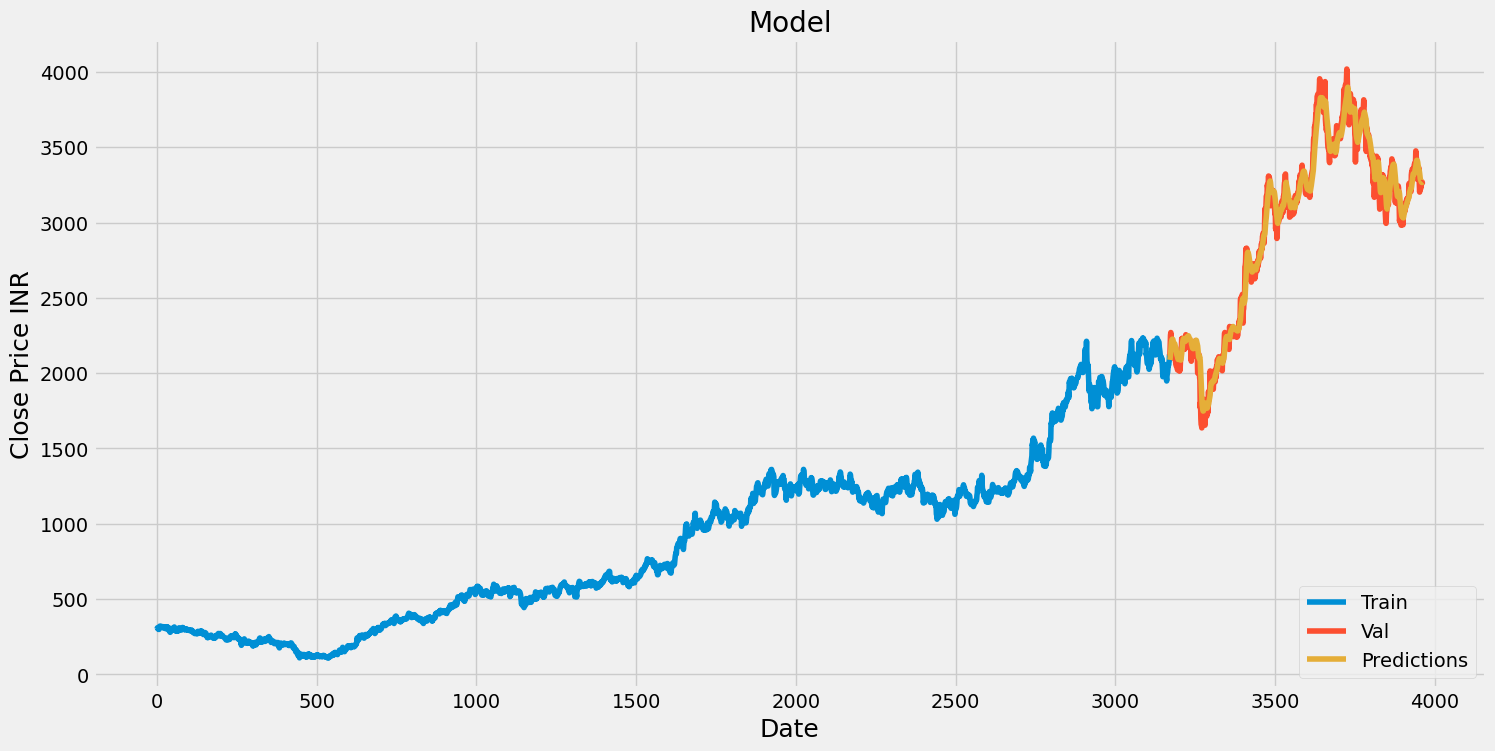

In [39]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [40]:
#show the valid and predicted prices
valid

,Price,Predictions
3171,2115.70,2087.876709
3172,2194.85,2102.617676
3173,2252.80,2125.059570
3174,2269.65,2155.399902
3175,2200.90,2187.477783
...,...,...
3958,3252.90,3270.102051
3959,3259.50,3266.743652
3960,3257.10,3266.061279
3961,3268.75,3266.293213
